# Load Libraries/Modules

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt

# Data Metric and Processing Metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import classification_report, accuracy_score, confusion_matrix
from patsy import dmatrices

# Import Modules for Modelling

# Linear Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# XGBoost
#import xgboost as xgb

# Stylistic

cbrn.set(style = 'ticks', palette = 'Set2')
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Faizan\\OneDrive\\OneDrive\\Statistical Cnslt and Tutoring\\ML_Jewerly_Clustering'

# Import Dataset

In [4]:
oj_raw = pd.read_csv('OJ.csv')

In [5]:
oj_raw

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


# Inspect Data Set

In [6]:
# To avoid scrolling through the above, the entire array will be printed to better gauge the available columns

oj_raw.columns.values

array(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [7]:
# Remove the Unnamed Column

oj_nopulp = oj_raw.drop(columns = ['Unnamed: 0'])
oj_nopulp.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [8]:
oj_nopulp.columns.values

array(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM',
       'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [9]:
oj_nopulp.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


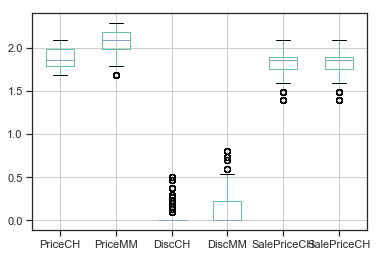

In [10]:
# Visualize Data to Assess Any Outliers

oj_nopulp.boxplot(column=['PriceCH','PriceMM','DiscCH','DiscMM','SalePriceCH','SalePriceCH'])

In [11]:
# Double check that code above works

oj_nopulp.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [12]:
oj_nopulp.to_csv (r'oj_nopulp.csv', index = None, header=True)

In [13]:
# For Purchase column, in order to properly include the variable in the models,
# convert MM (Minute Maid) to 1 and CH (Citrus Hill) to 0 by creating new column  

oj_nopulp['MM'] = oj_nopulp['Purchase'].apply(lambda x: 1 if x == 'MM' else 0)

In [15]:
# Double check that code above works

oj_nopulp.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,MM
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,0
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0


In [18]:
# Using dmatrices function from Patsy, two matrices will be created in order to cleanly separate the data

# In the following function, C's ahead of columns denote a categorical variableime

y, X = dmatrices('MM ~ WeekofPurchase + C(StoreID) + PriceCH + PriceMM + DiscCH + DiscMM + SpecialCH + SpecialMM + LoyalCH + SalePriceMM + SalePriceCH + PriceDiff +  PctDiscMM + PctDiscCH + ListPriceDiff', oj_nopulp, return_type = 'dataframe')

# Pandas Profiling Report

In [19]:
import pandas as pd
import pandas_profiling

pandas_profiling.ProfileReport(oj_nopulp)

ModuleNotFoundError: No module named 'pandas_profiling'

In [16]:
# Check shape and contents of matrices produced above - y

print(y.shape)

print('')

print(y.head())

(1070, 1)

    MM
0  0.0
1  0.0
2  0.0
3  1.0
4  0.0


In [20]:
# Check shape and contents of matrices produced above - X

print(X.shape)

print('')

print(X.head())

# There are four columns that will be created due to the fact that Store ID was processed as a categorical variable.
# These are dummy variables that are created as factors - if you have 5 unique values in a column, you'll have 4
# Levels or factors created (N - 1)

(1070, 19)

   Intercept  C(StoreID)[T.2]  C(StoreID)[T.3]  C(StoreID)[T.4]  \
0        1.0              0.0              0.0              0.0   
1        1.0              0.0              0.0              0.0   
2        1.0              0.0              0.0              0.0   
3        1.0              0.0              0.0              0.0   
4        1.0              0.0              0.0              0.0   

   C(StoreID)[T.7]  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  \
0              0.0           237.0     1.75     1.99    0.00     0.0   
1              0.0           239.0     1.75     1.99    0.00     0.3   
2              0.0           245.0     1.86     2.09    0.17     0.0   
3              0.0           227.0     1.69     1.69    0.00     0.0   
4              1.0           228.0     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0        0.0        0.0  0.500000         1.99         1.75       0.24   
1   

# Split the Data

In [21]:
# Training and Test Ratio to be used is 80-20

# X = feature matrix
# y = target vector

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
print("X Training:")
print(X_training.shape)
print("")

print("X Test:")
print(X_test.shape)
print("")

print("y training:")
print(y_training.shape)
print("")

print("y test:")
print(y_test.shape)
print("")

X Training:
(856, 19)

X Test:
(214, 19)

y training:
(856, 1)

y test:
(214, 1)



In [23]:
# Split the Training Set with 75-25 ratio - 75% for training, and 25% for validation
# The test_size of 0.25 below denotes that fact that of 100% of the training data
# 25% is being used

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [24]:
print("X Train: ")
print(X_train.shape)
print("")


print("X Val:")
print(X_val.shape)
print("")

print("y train:")
print(y_train.shape)
print("")

print("y val:")
print(y_val.shape)
print("")

X Train: 
(642, 19)

X Val:
(214, 19)

y train:
(642, 1)

y val:
(214, 1)



# Scaling the Data

Scaling Method 1 - Standard Scaler

In [25]:
# this will be used for any models that require normalization

scaler = StandardScaler()

# use fit_transform to fit the scaled data and transform it for training


X_train_ss = scaler.fit_transform(X_train)

# We're not going to fit X_val because we'll be using the mean and standard deviation from X_train_s.
# The reason why we want to scale by the mean and standard deviation of the training set is because
# we don't want the validation set to fit itself to any new data that comes through in production.
# This would ultimately lead to data snooping, and potentially lead to overfitting the model.
# For this reason, X_Val_S is transformed rather than fit transformed.

X_val_ss = scaler.transform(X_val)

X_test_ss = scaler.transform(X_test)

Scaling Method 2 - MinMaxScaler

In [26]:
# Scaling Method 2 - MinMaxScaler()
# alternative method that could be used in certain models to improve accuracy

scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train)
X_val_mms = scaler.transform(X_val)
X_test_mms = scaler.transform(X_test)

# Feature Selection

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf_test = DecisionTreeClassifier(random_state=0)     #sets the classifier to a basic decision tree
rfecv = RFECV(estimator=clf_test, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X_train, y_train)

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 1.93 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [29]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X_train.columns[rfecv.get_support()]

Optimal number of features : 9


Index(['C(StoreID)[T.2]', 'C(StoreID)[T.4]', 'WeekofPurchase', 'PriceMM',
       'SpecialMM', 'LoyalCH', 'SalePriceMM', 'PriceDiff', 'ListPriceDiff'],
      dtype='object')

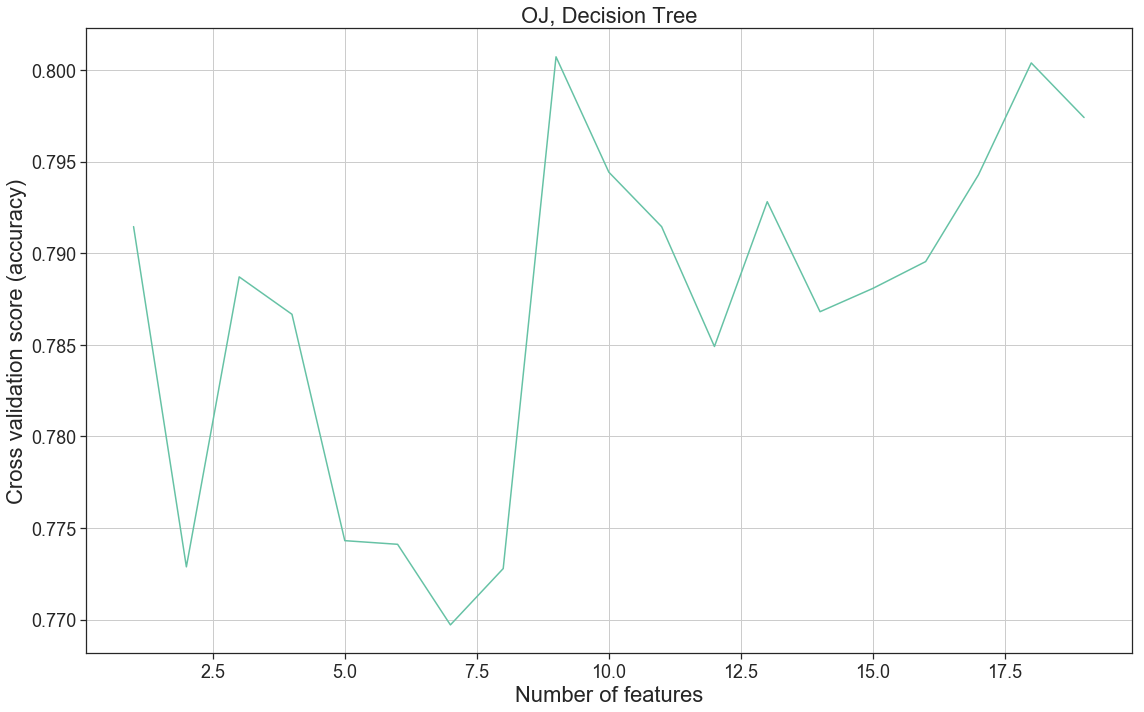

In [30]:
#Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('OJ, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();

# Model Creation & Optimization

In [31]:
# Writing the evaluation metrics as a function. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Linear Regression

In [32]:
lr = LogisticRegression(fit_intercept = False, 
                        penalty='l2', 
                        #dual=True,
                        #tol=0.0001,
                        C=1, 
                        #intercept_scaling=1.0,
                        #class_weight=None, 
                        random_state=42)

lr = lr.fit(X_training, y_training.values.ravel())
lr.coef_

lr_test_pred = lr.predict(X_test_mms)
lr_training_pred = lr.predict(X_training)

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)

grid_result = grid.fit(X_training, y_training)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s


Best Score:  0.8990879197530018
Best Params:  {'C': 1000, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   31.3s finished
C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
lr_tuned = LogisticRegression(fit_intercept = False,
                              penalty='l2', 
                              C=1000, 
                              class_weight= {1: 0.7, 0: 0.3}, 
                              random_state = 42)
                              
lr_tuned = lr_tuned.fit(X_training, y_training.values.ravel())
lr_tuned.coef_

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 2.91720128,  0.25139508, -0.2699825 , -0.77019261, -0.51515938,
        -0.02493075,  2.08935559,  0.16888711,  0.16602911,  0.17628145,
         0.15236572,  0.26974053, -6.0795348 , -0.00739434,  1.92332648,
        -1.93072082, -0.19427786,  0.05648664, -1.92046848]])

In [35]:
lr_test_pred = lr_tuned.predict(X_test_mms)
lr_training_pred = lr_tuned.predict(X_training)

Linear Regression Confusion Matrix - Training

In [36]:
confusion_matrix(y_training, y_training)

array([[523,   0],
       [  0, 333]], dtype=int64)

In [37]:
print(classification_report(y_training, lr_training_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       523
         1.0       0.71      0.89      0.79       333

   micro avg       0.82      0.82      0.82       856
   macro avg       0.81      0.83      0.81       856
weighted avg       0.84      0.82      0.82       856



Linear Regression Confusion Matrix - Test

In [38]:
confusion_matrix(y_test, lr_test_pred)

array([[127,   3],
       [ 68,  16]], dtype=int64)

In [39]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78       130
         1.0       0.84      0.19      0.31        84

   micro avg       0.67      0.67      0.67       214
   macro avg       0.75      0.58      0.55       214
weighted avg       0.73      0.67      0.60       214



ROC Curve - Linear Regression

In [40]:
# Plot the ROC curve for Linear Regression


from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(lr, X_test, y_test, name, ax, show_thresholds=True):
    lr_test_pred = lr.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, lr_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

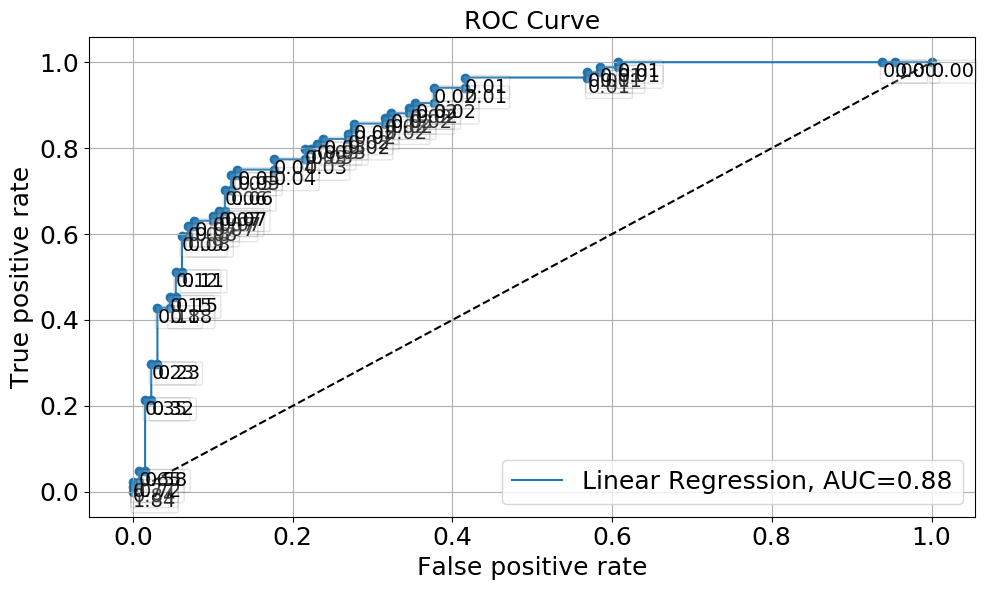

In [41]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(lr, X_test_mms, y_test, "Linear Regression", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

ROC Curve - Training Validation

In [42]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
y_pred_lr_train = lr.predict(X_train)

print("Accuracy = {:.2f}".format(accuracy_score(y_train, y_pred_lr_train)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_train, y_pred_lr_train)))
print("F1 Score = {:.2f}".format(f1_score(y_train, y_pred_lr_train)))
print("Log Loss = {:.2f}".format(log_loss(y_train, y_pred_lr_train)))
print(confusion_matrix(y_train, y_pred_lr_train))

Accuracy = 0.85
Kappa = 0.68
F1 Score = 0.80
Log Loss = 5.16
[[355  41]
 [ 55 191]]


In [39]:
#plt.style.use('default');
#figure = plt.figure(figsize=(10, 6));    
#ax = plt.subplot(1, 1, 1);
#plot_roc(lr, X_train_mms, y_train, "Linear Regression", ax)
#plt.legend(loc='lower right', fontsize=18);
#plt.tight_layout();

# Random Forest

Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_training, y_training)

Build Model

In [ ]:
rf_clf = rf_random

#rf_clf = RandomForestClassifier(n_jobs=2, random_state=42)

# Training the random forest Classifier 
rf_clf.fit(X_training, y_training.values.ravel())

rf_training_pred = rf_clf.predict(X_training)

rf_train_pred = rf_clf.predict(X_train_mms)

rf_test_pred = rf_clf.predict(X_test_mms)

rf_val_pred = rf_clf.predict(X_val_mms)

Random Forest Confusion Matrix - Training

In [43]:
confusion_matrix(y_training, rf_training_pred)

array([[490,  33],
       [ 46, 287]])

In [44]:
print(classification_report(y_training, rf_training_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       523
         1.0       0.90      0.86      0.88       333

    accuracy                           0.91       856
   macro avg       0.91      0.90      0.90       856
weighted avg       0.91      0.91      0.91       856



Random Forest Confusion Matrix - Testing

In [45]:
confusion_matrix(y_test, rf_test_pred)

array([[114,  16],
       [ 28,  56]])

In [46]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       130
         1.0       0.78      0.67      0.72        84

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214



In [47]:
#plot the ROC curve for the Random Forest Classifier

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    rf_test_pred = clf.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, rf_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

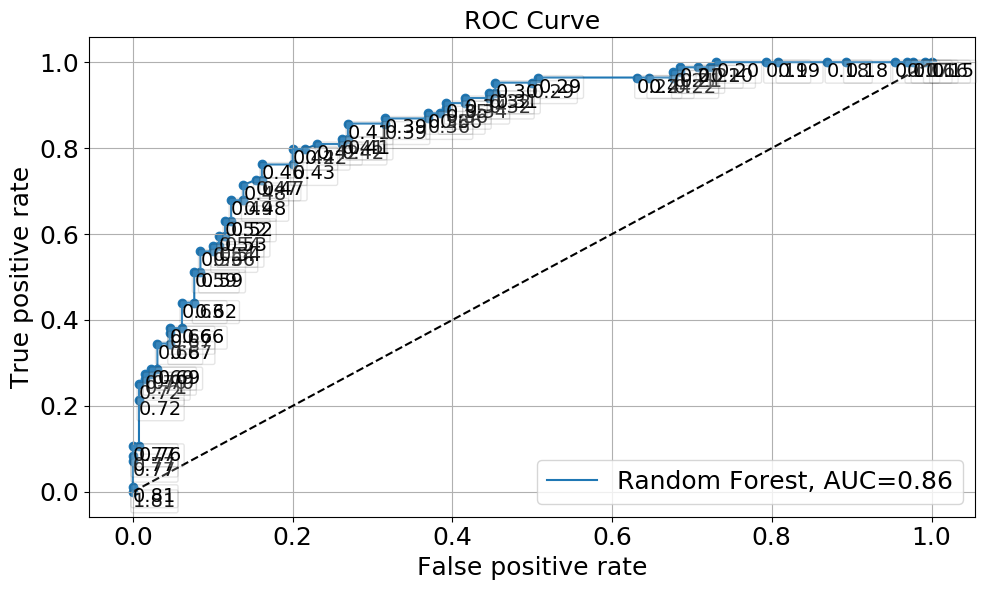

In [48]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(rf_clf, X_test_mms, y_test, "Random Forest", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [49]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
y_pred_rf_train = rf_clf.predict(X_train)

print("Accuracy = {:.2f}".format(accuracy_score(y_train, y_pred_rf_train)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_train, y_pred_rf_train)))
print("F1 Score = {:.2f}".format(f1_score(y_train, y_pred_rf_train)))
print("Log Loss = {:.2f}".format(log_loss(y_train, y_pred_rf_train)))
print(confusion_matrix(y_train, y_pred_rf_train))

Accuracy = 0.91
Kappa = 0.81
F1 Score = 0.88
Log Loss = 3.01
[[374  22]
 [ 34 212]]


In [50]:
#plt.style.use('default');
#figure = plt.figure(figsize=(10, 6));    
#ax = plt.subplot(1, 1, 1);
#plot_roc(rf_clf, X_train, y_train, "Decision Tree", ax)
#plt.legend(loc='lower right', fontsize=18);
#plt.tight_layout();

# Naive Bayes 

In [51]:
nb = GaussianNB()
nb = nb.fit(X_training, y_training.values.ravel())
nb

nb_training_pred = nb.predict(X_training)
nb_test_pred = nb.predict(X_test_mms)

Naive Bayes Confusion Matrix - Training

In [52]:
confusion_matrix(y_training, nb_training_pred)

array([[384, 139],
       [ 62, 271]])

In [53]:
print(classification_report(y_training, nb_training_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       523
         1.0       0.66      0.81      0.73       333

    accuracy                           0.77       856
   macro avg       0.76      0.77      0.76       856
weighted avg       0.78      0.77      0.77       856



Naive Bayes Confusion - Testing

In [54]:
confusion_matrix(y_test, nb_test_pred)

array([[ 19, 111],
       [  3,  81]])

In [55]:
print(classification_report(y_test, nb_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.15      0.25       130
         1.0       0.42      0.96      0.59        84

    accuracy                           0.47       214
   macro avg       0.64      0.56      0.42       214
weighted avg       0.69      0.47      0.38       214



ROC Curve - Naive Bayes

#plot the ROC curve for the Naive Bayes Classifier

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(nb, X_test, y_test, name, ax, show_thresholds=True):
    nb_test_pred = nb.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, nb_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

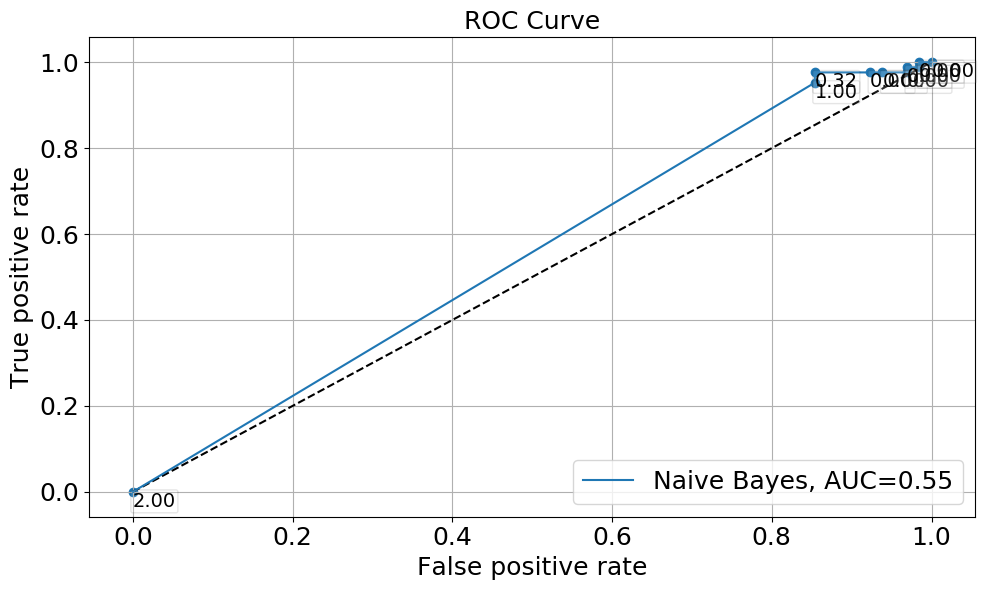

In [56]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(nb, X_test, y_test, "Naive Bayes", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

ROC Curve - Training Validation

In [57]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
y_pred_nb_train = nb.predict(X_train)

print("Accuracy = {:.2f}".format(accuracy_score(y_train, y_pred_nb_train)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_train, y_pred_nb_train)))
print("F1 Score = {:.2f}".format(f1_score(y_train, y_pred_nb_train)))
print("Log Loss = {:.2f}".format(log_loss(y_train, y_pred_nb_train)))
print(confusion_matrix(y_train, y_pred_nb_train))

Accuracy = 0.78
Kappa = 0.55
F1 Score = 0.74
Log Loss = 7.64
[[298  98]
 [ 44 202]]


In [58]:
#plt.style.use('default');
#figure = plt.figure(figsize=(10, 6));    
#ax = plt.subplot(1, 1, 1);
#plot_roc(nb, X_train, y_train, "Naive Bayes", ax)
#plt.legend(loc='lower right', fontsize=18);
#plt.tight_layout();

# KNN

In [90]:
k_knn = 10

model_knn =  KNeighborsClassifier(n_neighbors=k_knn)
model_knn.fit(X_training, y_training.values.ravel())

knn_training_pred = model_knn.predict(X_training)
knn_test_pred = model_knn.predict(X_test_mms)

Hyperparameter Tuning

In [91]:
from sklearn.cluster import KMeans

SSE = []
KVal = range(1,20)
for i in KVal:
    km = KMeans(n_clusters=i)
    km = km.fit(X_train_mms)
    SSE.append(km.inertia_)

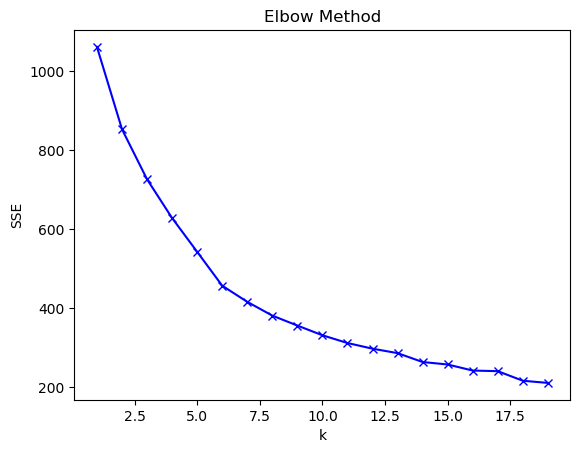

In [92]:
plt.plot(KVal, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

KNN Confusion Matrix - Training

In [93]:
confusion_matrix(y_training, knn_training_pred)

array([[476,  47],
       [140, 193]])

In [94]:
print(classification_report(y_training, knn_training_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84       523
         1.0       0.80      0.58      0.67       333

    accuracy                           0.78       856
   macro avg       0.79      0.74      0.75       856
weighted avg       0.78      0.78      0.77       856



KNN Confusion Matrix - Testing

In [95]:
confusion_matrix(y_test, knn_test_pred)

array([[  0, 130],
       [  0,  84]])

In [96]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       130
         1.0       0.39      1.00      0.56        84

    accuracy                           0.39       214
   macro avg       0.20      0.50      0.28       214
weighted avg       0.15      0.39      0.22       214



ROC Curve - KNN

In [97]:
#plot the ROC curve for the KNN

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(model_knn, X_test, y_test, name, ax, show_thresholds=True):
    nb_test_pred = model_knn.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, knn_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

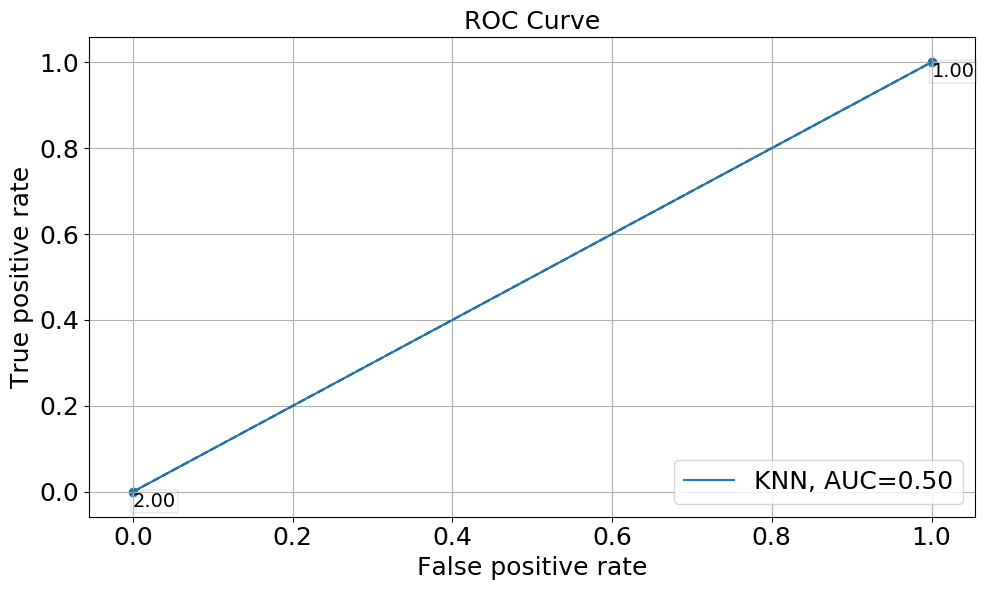

In [98]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(model_knn, X_test_mms, y_test, "KNN", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# SVM

In [68]:
svm_model = SVC(gamma='auto',probability=True)
svm_model.fit(X_training, y_training.values.ravel())

svm_training_pred = svm_model.predict(X_training)
svm_test_pred = svm_model.predict(X_test_mms)

Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_training, y_training)
    grid_search.best_params_
    return grid_search.best_params_

SVM Confusion Matrix - Training

In [70]:
confusion_matrix(y_training, svm_training_pred)

array([[478,  45],
       [120, 213]])

In [71]:
print(classification_report(y_training, svm_training_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       523
         1.0       0.83      0.64      0.72       333

    accuracy                           0.81       856
   macro avg       0.81      0.78      0.79       856
weighted avg       0.81      0.81      0.80       856



SVM Confusion Matrix - Testing

In [72]:
confusion_matrix(y_test, svm_test_pred)

array([[130,   0],
       [ 84,   0]])

In [73]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       130
         1.0       0.00      0.00      0.00        84

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214



ROC Curve - SVM

In [74]:
#plot the ROC curve for the SVM

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(svm_model, X_test, y_test, name, ax, show_thresholds=True):
    svm_test_pred = svm_model.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, svm_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

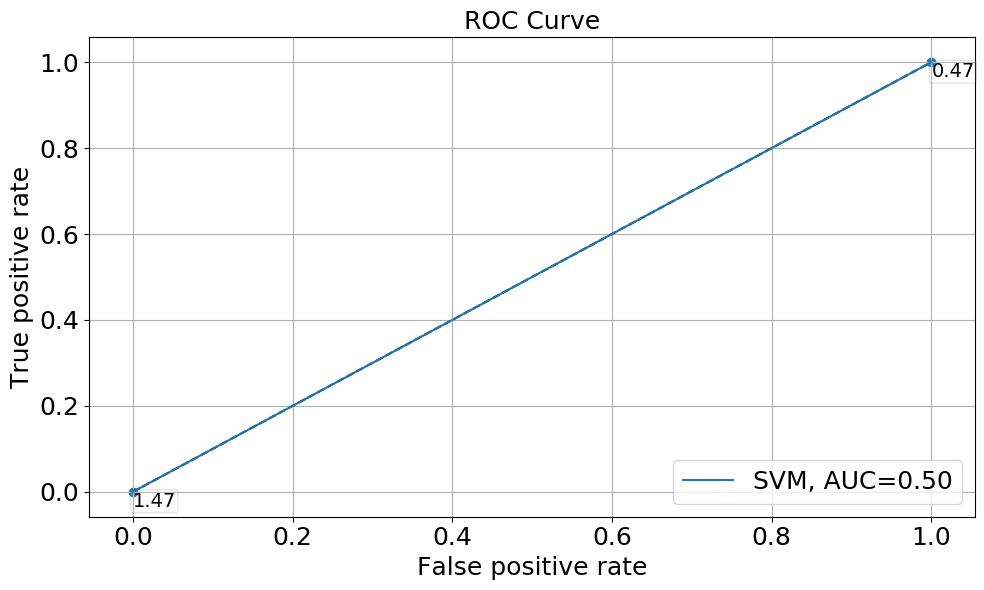

In [75]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(svm_model, X_test_mms, y_test, "SVM", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

ROC Curve - Training Validation

In [99]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
y_pred_svm_train = svm_model.predict(X_train)

print("Accuracy = {:.2f}".format(accuracy_score(y_train, y_pred_svm_train)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_train, y_pred_svm_train)))
print("F1 Score = {:.2f}".format(f1_score(y_train, y_pred_svm_train)))
print("Log Loss = {:.2f}".format(log_loss(y_train, y_pred_svm_train)))
print(confusion_matrix(y_train, y_pred_svm_train))

Accuracy = 0.82
Kappa = 0.61
F1 Score = 0.74
Log Loss = 6.13
[[369  27]
 [ 87 159]]


ValueError: Found input variables with inconsistent numbers of samples: [642, 214]

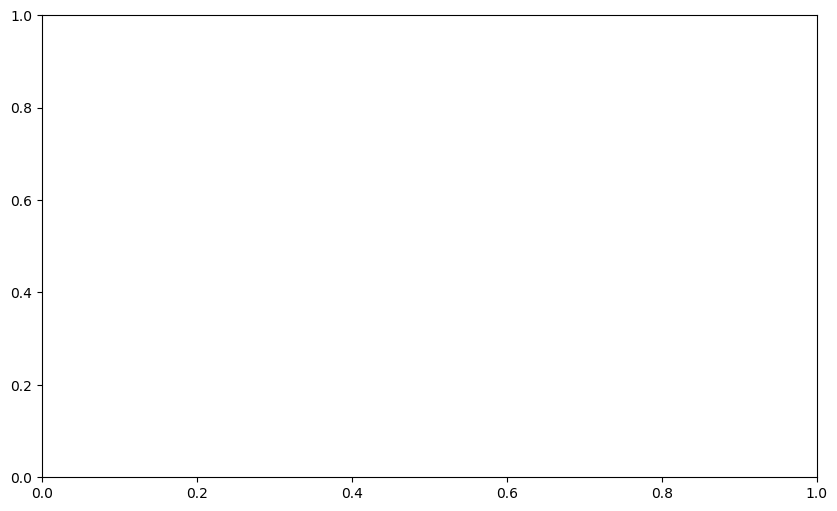

In [100]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(svm_model, X_train_mms, y_train, "SVM", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

In [49]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [51]:
import keras
pip list
keras.__version__

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [52]:
pip list

Package                            Version 
---------------------------------- --------
alabaster                          0.7.12  
anaconda-client                    1.7.2   
anaconda-navigator                 1.9.7   
anaconda-project                   0.8.2   
asn1crypto                         0.24.0  
astroid                            2.2.5   
astropy                            3.1.2   
atomicwrites                       1.3.0   
attrs                              19.1.0  
Babel                              2.6.0   
backcall                           0.1.0   
backports.os                       0.1.1   
backports.shutil-get-terminal-size 1.0.0   
beautifulsoup4                     4.7.1   
bitarray                           0.8.3   
bkcharts                           0.2     
bleach                             3.1.0   
bokeh                              1.0.4   
boto                               2.49.0  
Bottleneck                         1.2.1   
certifi                         

In [48]:

#from tensorflow.python.keras import backend
#from tensorflow.keras import backend
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot


trainX = X_training
trainy = y_training
testX = X_val
testy = y_val


#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_s = scaler.fit_transform(X_train)
#X_val_s = scaler.transform(X_val)
#X_test_s = scaler.transform(X_test)

#trainX = X_train_s
#trainy = y_train
#testX = X_val_s
#testy = y_val

# define model
model = Sequential()
model.add(Dense(50, input_dim=trainX.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)#, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

nn_training_pred = model.predict_classes(trainX)
nn_test_pred = model.predict_classes(testX)

ModuleNotFoundError: No module named 'keras'